In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import os

def get_filenames(folder_path):
    filenames = []
    for filename in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, filename)):
            filenames.append(filename)
    return filenames

# 使用示例
folder_path = 'motion_data/'  # 替换成你的文件夹路径
file_list = get_filenames(folder_path)

file_list.sort()
file_list

['3_time_jumps.txt']

In [9]:
import os

def read_files_to_dataframes(folder_path):
    dataframes = {}
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            # 读取CSV文件
            df = pd.read_csv(file_path, sep='\t')
            data = pd.DataFrame()
            data[['acc_X(g)', 'acc_Y(g)', 'acc_Z(g)', 'ang_X(g)', 'ang_Y(g)', 'ang_Z(g)', 'Time']] = df[['加速度X(g)', '加速度Y(g)', '加速度Z(g)',
                                                                     '角速度X(°/s)', '角速度Y(°/s)','角速度Z(°/s)', '时间']]
            data['Time'] = pd.to_datetime(data['Time'], format='%Y-%m-%d %H:%M:%S:%f')
            # 将DataFrame存储在以文件名为键的字典中
            dataframes[filename] = data
    return dataframes

# 使用示例
folder_path = 'motion_data'  # 替换成你的文件夹路径
dfs = read_files_to_dataframes(folder_path)

# 打印每个DataFrame的信息（可选）
for filename, df in dfs.items():
    filename = filename[0:12]
    print(f"Data from {filename}:")
    print(df.head())  # 打印每个DataFrame的前几行


Data from 3_time_jumps:
   acc_X(g)  acc_Y(g)  acc_Z(g)  ang_X(g)  ang_Y(g)  ang_Z(g)  \
0     0.733     0.384     0.546    -4.089     0.854     0.427   
1     0.707     0.379     0.563    -7.202     0.916    -1.099   
2     0.734     0.393     0.554   -16.602    -0.977    -0.793   
3     0.692     0.397     0.578   -12.390     5.310     5.798   
4     0.721     0.399     0.563    -2.136     9.949    20.874   

                     Time  
0 2024-01-16 20:42:09.954  
1 2024-01-16 20:42:10.100  
2 2024-01-16 20:42:10.132  
3 2024-01-16 20:42:10.222  
4 2024-01-16 20:42:10.342  


Plotting data from 3_time_jumps.txt...
Plotting data from 3_time_jumps.txt...
Plotting data from 3_time_jumps.txt...
Plotting data from 3_time_jumps.txt...


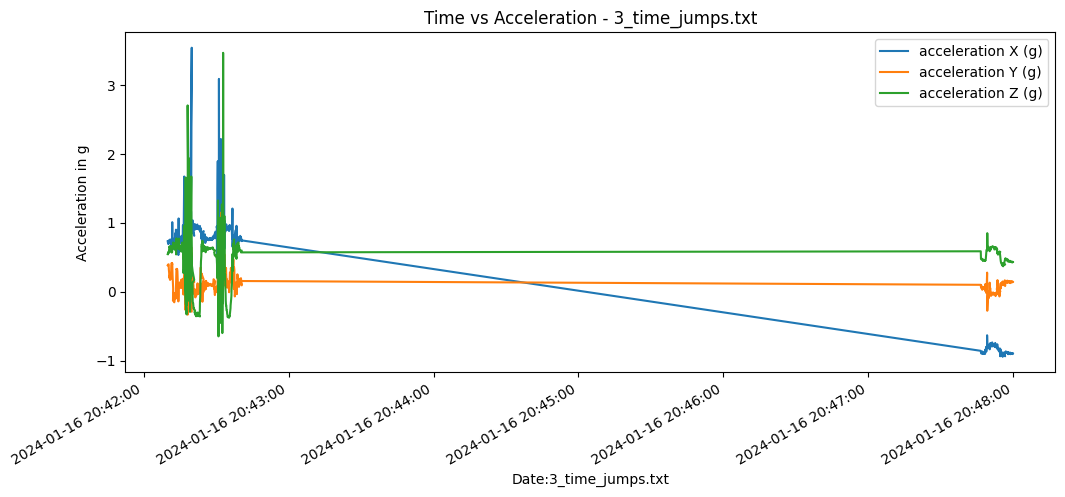

In [14]:

for filename, df in dfs.items():
    

    print(f"Plotting data from {filename}...")

    plt.figure(figsize=(12, 5))

    print(f"Plotting data from {filename}...")

    # 绘制每个加速度分量

    plt.plot(df['Time'], df['acc_X(g)'], label='acceleration X (g)')
    plt.plot(df['Time'], df['acc_Y(g)'], label='acceleration Y (g)')
    plt.plot(df['Time'], df['acc_Z(g)'], label='acceleration Z (g)')
    #plt.plot(df['Time'], df['ang_X(g)'], label='angular_velocity X (g)')
    #plt.plot(df['Time'], df['ang_Y(g)'], label='angular_velocity Y (g)')
    #plt.plot(df['Time'], df['ang_Z(g)'], label='angular_velocity Z (g)')

    print(f"Plotting data from {filename}...")

    # 格式化图表
    plt.xlabel('Date:' + filename)
    plt.ylabel('Acceleration in g')
    plt.title(f'Time vs Acceleration - {filename}')
    plt.legend()
    plt.grid(False)

    print(f"Plotting data from {filename}...")

    # 改进日期格式化
    plt.gcf().autofmt_xdate()
    myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
    plt.gca().xaxis.set_major_formatter(myFmt)

    plt.show()
